In [1]:

%pprint
import sys
import os.path as osp
sys.path.insert(1, osp.abspath('../py'))
from StatsByCountry import nu, ssu

Pretty printing has been turned OFF



# Net Migration Rate vs Population Growth Rate

According to Wikipedia, an excess of people entering a country is referred to as net immigration (e.g., 3.56 migrants/1,000 population). An excess of people leaving a country is referred to as net emigration (e.g., -9.26 migrants/1,000 population). The net migration rate indicates the contribution of migration to the overall level of population change. The net migration rate does not distinguish between economic migrants, refugees, and other types of migrants nor does it distinguish between lawful migrants and undocumented migrants.

The migration data is from [https://en.wikipedia.org/wiki/List_of_sovereign_states_by_net_migration_rate](https://en.wikipedia.org/wiki/List_of_sovereign_states_by_net_migration_rate) and the population growth data is from [https://en.wikipedia.org/wiki/List_of_countries_by_population_growth_rate](https://en.wikipedia.org/wiki/List_of_countries_by_population_growth_rate). The jupyter notebook can be seen at [https://github.com/dbabbitt/StatsByCountry/blob/master/scatterplots/Population%20Decline.ipynb](https://github.com/dbabbitt/StatsByCountry/blob/master/scatterplots/Population%20Decline.ipynb).

A [low R-square of at least 0.1 (or 10 percent)](https://www.researchgate.net/publication/361406942_The_Acceptable_R-Square_in_Empirical_Modelling_for_Social_Science_Research) is acceptable in the social sciences on the condition that some or most of the predictors or explanatory variables are statistically significant.

In [2]:

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_growth_rate'
table_dfs_list = nu.get_page_tables(url)

[(0, (241, 7)), (2, (13, 2)), (1, (9, 2))]


In [35]:

population_growth_df = table_dfs_list[0].copy()
population_growth_df.columns = ['Country', 'CIA_percent', 'CIA_Year', 'WB_2009', 'UN_2005_2010', 'UN2010_2015', 'UN_2015_2020']
population_growth_df.Country = population_growth_df.Country.map(lambda x: str(x).split('*')[0].replace('\u202f', ''))

mask_series = (population_growth_df.Country == 'São Tomé and Príncipe')
population_growth_df.loc[mask_series, 'Country'] = 'Sao Tome and Principe'

mask_series = (population_growth_df.Country == 'Cape Verde')
population_growth_df.loc[mask_series, 'Country'] = 'Cabo Verde'

mask_series = (population_growth_df.Country == 'Macau')
population_growth_df.loc[mask_series, 'Country'] = 'Macao'

mask_series = (population_growth_df.Country == 'Vietnam')
population_growth_df.loc[mask_series, 'Country'] = 'Viet Nam'

mask_series = (population_growth_df.Country == 'Falkland Islands')
population_growth_df.loc[mask_series, 'Country'] = 'Falkland Islands (Malvinas)'

mask_series = (population_growth_df.Country == 'United States')
population_growth_df.loc[mask_series, 'Country'] = 'United States of America'

mask_series = (population_growth_df.Country == 'U.S. Virgin Islands')
population_growth_df.loc[mask_series, 'Country'] = 'Virgin Islands (U.S.)'

mask_series = (population_growth_df.Country == 'Pitcairn Islands')
population_growth_df.loc[mask_series, 'Country'] = 'Pitcairn'

mask_series = (population_growth_df.Country == 'Sint Maarten')
population_growth_df.loc[mask_series, 'Country'] = 'Sint Maarten (Dutch part)'

mask_series = (population_growth_df.Country == 'Turkey')
population_growth_df.loc[mask_series, 'Country'] = 'Türkiye'

mask_series = (population_growth_df.Country == 'Netherlands')
population_growth_df.loc[mask_series, 'Country'] = 'Netherlands, Kingdom of the'

mask_series = (population_growth_df.Country == 'Svalbard')
population_growth_df.loc[mask_series, 'Country'] = 'Svalbard and Jan Mayen'

mask_series = (population_growth_df.Country == 'Brunei')
population_growth_df.loc[mask_series, 'Country'] = 'Brunei Darussalam'

population_growth_df

,Country,CIA_percent,CIA_Year,WB_2009,UN_2005_2010,UN2010_2015,UN_2015_2020
0,World,1.17,NaN,1.15,1.23,1.19,1.09
1,Asia/Other non-specified areas,NaN,NaN,NaN,0.43,0.16,NaN
2,Afghanistan,2.26,2023.0,2.44,2.78,3.16,2.41
3,Albania,0.19,2023.0,0.26,-0.92,-0.12,0.13
4,Algeria,1.27,2023.0,1.89,1.63,1.98,1.67
...,...,...,...,...,...,...,...
236,British Virgin Islands,1.87,2023.0,NaN,3.23,2.02,NaN
237,Virgin Islands (U.S.),-0.49,2023.0,-0.48,-0.26,-0.02,NaN
238,Wallis and Futuna,0.23,2023.0,NaN,-0.98,-0.62,NaN
239,West Bank,1.66,2023.0,NaN,NaN,NaN,NaN


In [ ]:

df = nu.check_for_typos(ssu.alpha3_to_country_dict.values(), population_growth_df.Country)
mask_series = (df.max_similarity == 1.0)
for row_index, row_series in df[~mask_series].sort_values('max_similarity', ascending=False).head(20).iterrows():
    print(f"""
mask_series = (population_growth_df.Country == '{row_series.right_item}')
population_growth_df.loc[mask_series, 'Country'] = '{row_series.left_item}'""")

In [37]:

url = 'https://en.wikipedia.org/wiki/List_of_sovereign_states_by_net_migration_rate'
table_dfs_list = nu.get_page_tables(url)

[(0, (231, 3)), (1, (13, 2)), (2, (9, 2))]


In [54]:

net_migration_df = table_dfs_list[0].copy()
net_migration_df.columns = ['Country', 'total_net_migration', 'migration_per_1000']
# net_migration_df.Country = net_migration_df.Country.map(lambda x: str(x).split('*')[0].replace('\u202f', ''))

mask_series = (net_migration_df.Country == 'Saint Helena, Ascension, and Tristan da Cunha')
net_migration_df.loc[mask_series, 'Country'] = 'Saint Helena, Ascension and Tristan da Cunha'

mask_series = (net_migration_df.Country == 'South Georgia and South Sandwich Islands')
net_migration_df.loc[mask_series, 'Country'] = 'South Georgia and the South Sandwich Islands'

mask_series = (net_migration_df.Country == 'Saint Barthelemy')
net_migration_df.loc[mask_series, 'Country'] = 'Saint Barthélemy'

mask_series = (net_migration_df.Country == 'Curacao')
net_migration_df.loc[mask_series, 'Country'] = 'Curaçao'

mask_series = (net_migration_df.Country == 'Vietnam')
net_migration_df.loc[mask_series, 'Country'] = 'Viet Nam'

mask_series = (net_migration_df.Country == 'Cape Verde')
net_migration_df.loc[mask_series, 'Country'] = 'Cabo Verde'

mask_series = (net_migration_df.Country == 'Macau')
net_migration_df.loc[mask_series, 'Country'] = 'Macao'

mask_series = (net_migration_df.Country == 'St. Lucia')
net_migration_df.loc[mask_series, 'Country'] = 'Saint Lucia'

mask_series = (net_migration_df.Country == 'United States')
net_migration_df.loc[mask_series, 'Country'] = 'United States of America'

mask_series = (net_migration_df.Country == 'U.S. Virgin Islands')
net_migration_df.loc[mask_series, 'Country'] = 'Virgin Islands (U.S.)'

mask_series = (net_migration_df.Country == 'Sint Maarten')
net_migration_df.loc[mask_series, 'Country'] = 'Sint Maarten (Dutch part)'

mask_series = (net_migration_df.Country == 'Turkey')
net_migration_df.loc[mask_series, 'Country'] = 'Türkiye'

mask_series = (net_migration_df.Country == 'Netherlands')
net_migration_df.loc[mask_series, 'Country'] = 'Netherlands, Kingdom of the'

net_migration_df.sort_values('migration_per_1000')

,Country,total_net_migration,migration_per_1000
230,American Samoa,-810,-27.4
229,Cook Islands,-,-26.2
228,Micronesia,-600,-20.9
227,Tonga,-800,-18.1
226,Northern Mariana Islands,-50,-13.5
...,...,...,...
4,British Virgin Islands,200,13.2
3,Venezuela,297713,13.6
2,South Sudan,-30694,20.0
1,Ukraine,-6673580,37.3


In [ ]:

df = nu.check_for_typos(ssu.alpha3_to_country_dict.values(), net_migration_df.Country)
mask_series = (df.max_similarity == 1.0)
for row_index, row_series in df[~mask_series].sort_values('max_similarity', ascending=False).head(20).iterrows():
    print(f"""
mask_series = (net_migration_df.Country == '{row_series.right_item}')
net_migration_df.loc[mask_series, 'Country'] = '{row_series.left_item}'""")

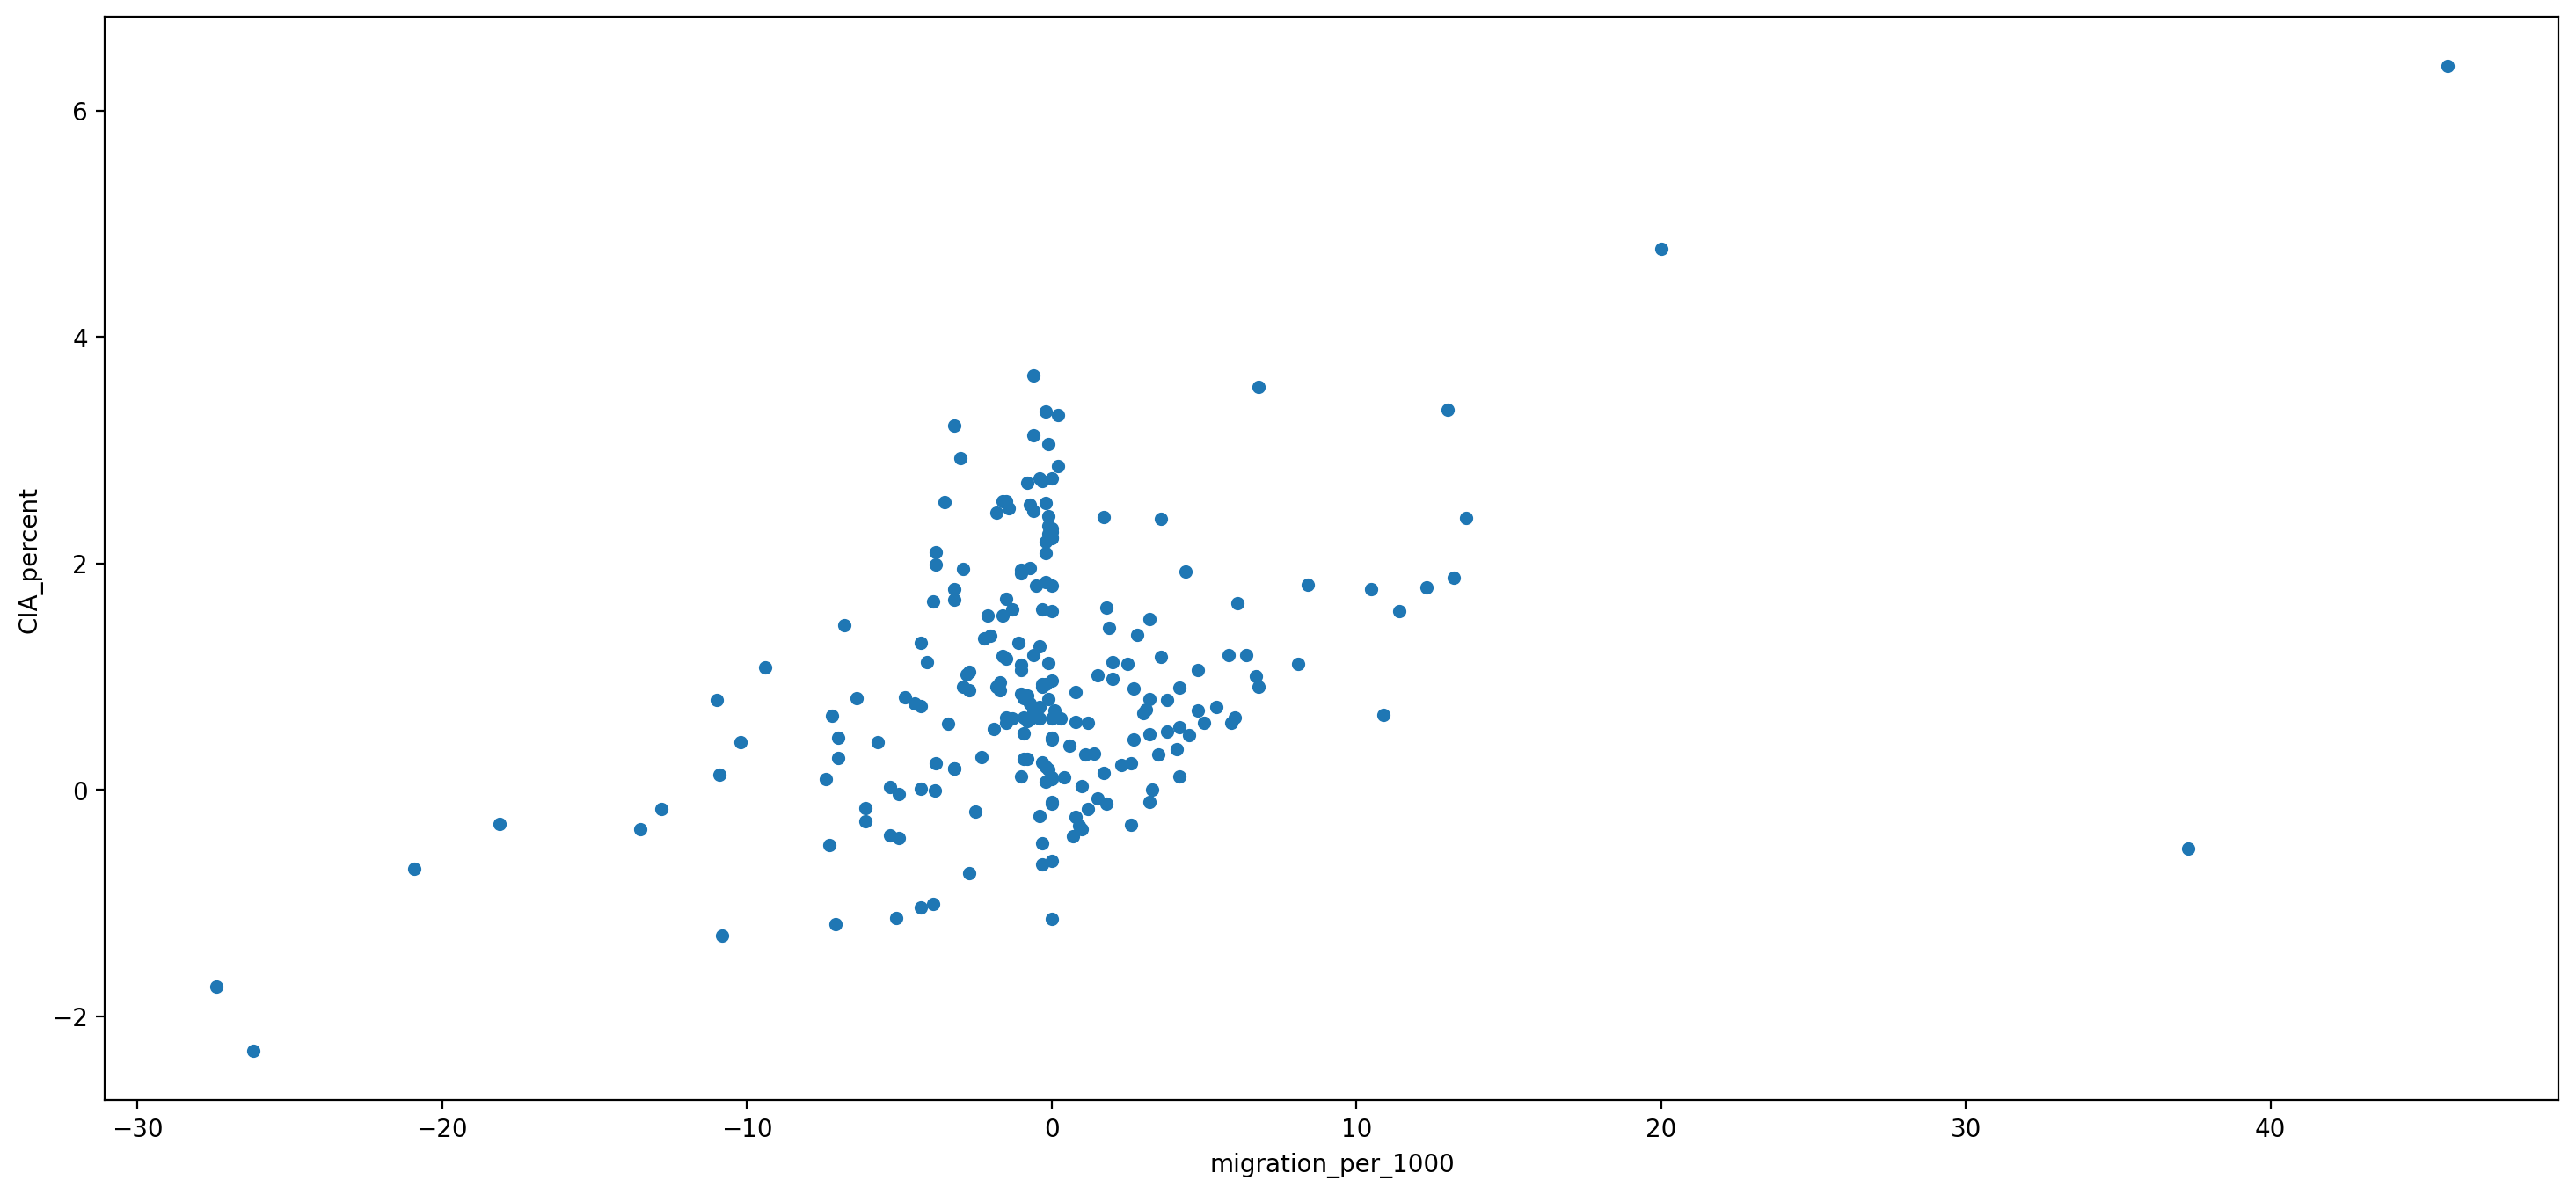

In [72]:

import matplotlib.pyplot as plt
import pandas as pd

countries_set = set(net_migration_df.Country).intersection(set(population_growth_df.Country))
rows_list = []
for country_name in countries_set:
    row_dict = {}
    row_dict['country_name'] = country_name
    mask_series = (net_migration_df.Country == country_name)
    migration_per_1000 = net_migration_df[mask_series].migration_per_1000.squeeze()
    row_dict['migration_per_1000'] = migration_per_1000
    mask_series = (population_growth_df.Country == country_name)
    CIA_percent = population_growth_df[mask_series].CIA_percent.squeeze()
    row_dict['CIA_percent'] = CIA_percent
    rows_list.append(row_dict)
population_growth_vs_migration_df = pd.DataFrame(rows_list).dropna().sort_values('migration_per_1000')
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
Line2D_objs_list = population_growth_vs_migration_df.plot.scatter('migration_per_1000', 'CIA_percent', ax=ax)

In [ ]:

nu.first_order_linear_scatterplot??

In [67]:

population_growth_vs_migration_df

,country_name,migration_per_1000,CIA_percent
219,American Samoa,-27.4,-1.74
96,Cook Islands,-26.2,-2.31
186,Micronesia,-20.9,-0.70
40,Tonga,-18.1,-0.30
196,Northern Mariana Islands,-13.5,-0.35
...,...,...,...
167,British Virgin Islands,13.2,1.87
7,Venezuela,13.6,2.40
28,South Sudan,20.0,4.78
101,Ukraine,37.3,-0.52


In [69]:

population_growth_vs_migration_df.sort_values('CIA_percent')

,country_name,migration_per_1000,CIA_percent
96,Cook Islands,-26.2,-2.31
219,American Samoa,-27.4,-1.74
72,Puerto Rico,-10.8,-1.29
69,Saint Pierre and Miquelon,-7.1,-1.19
77,Moldova,0.0,-1.14
...,...,...,...
15,Burundi,6.8,3.56
29,Niger,-0.6,3.66
28,South Sudan,20.0,4.78
33,Syria,45.8,6.39


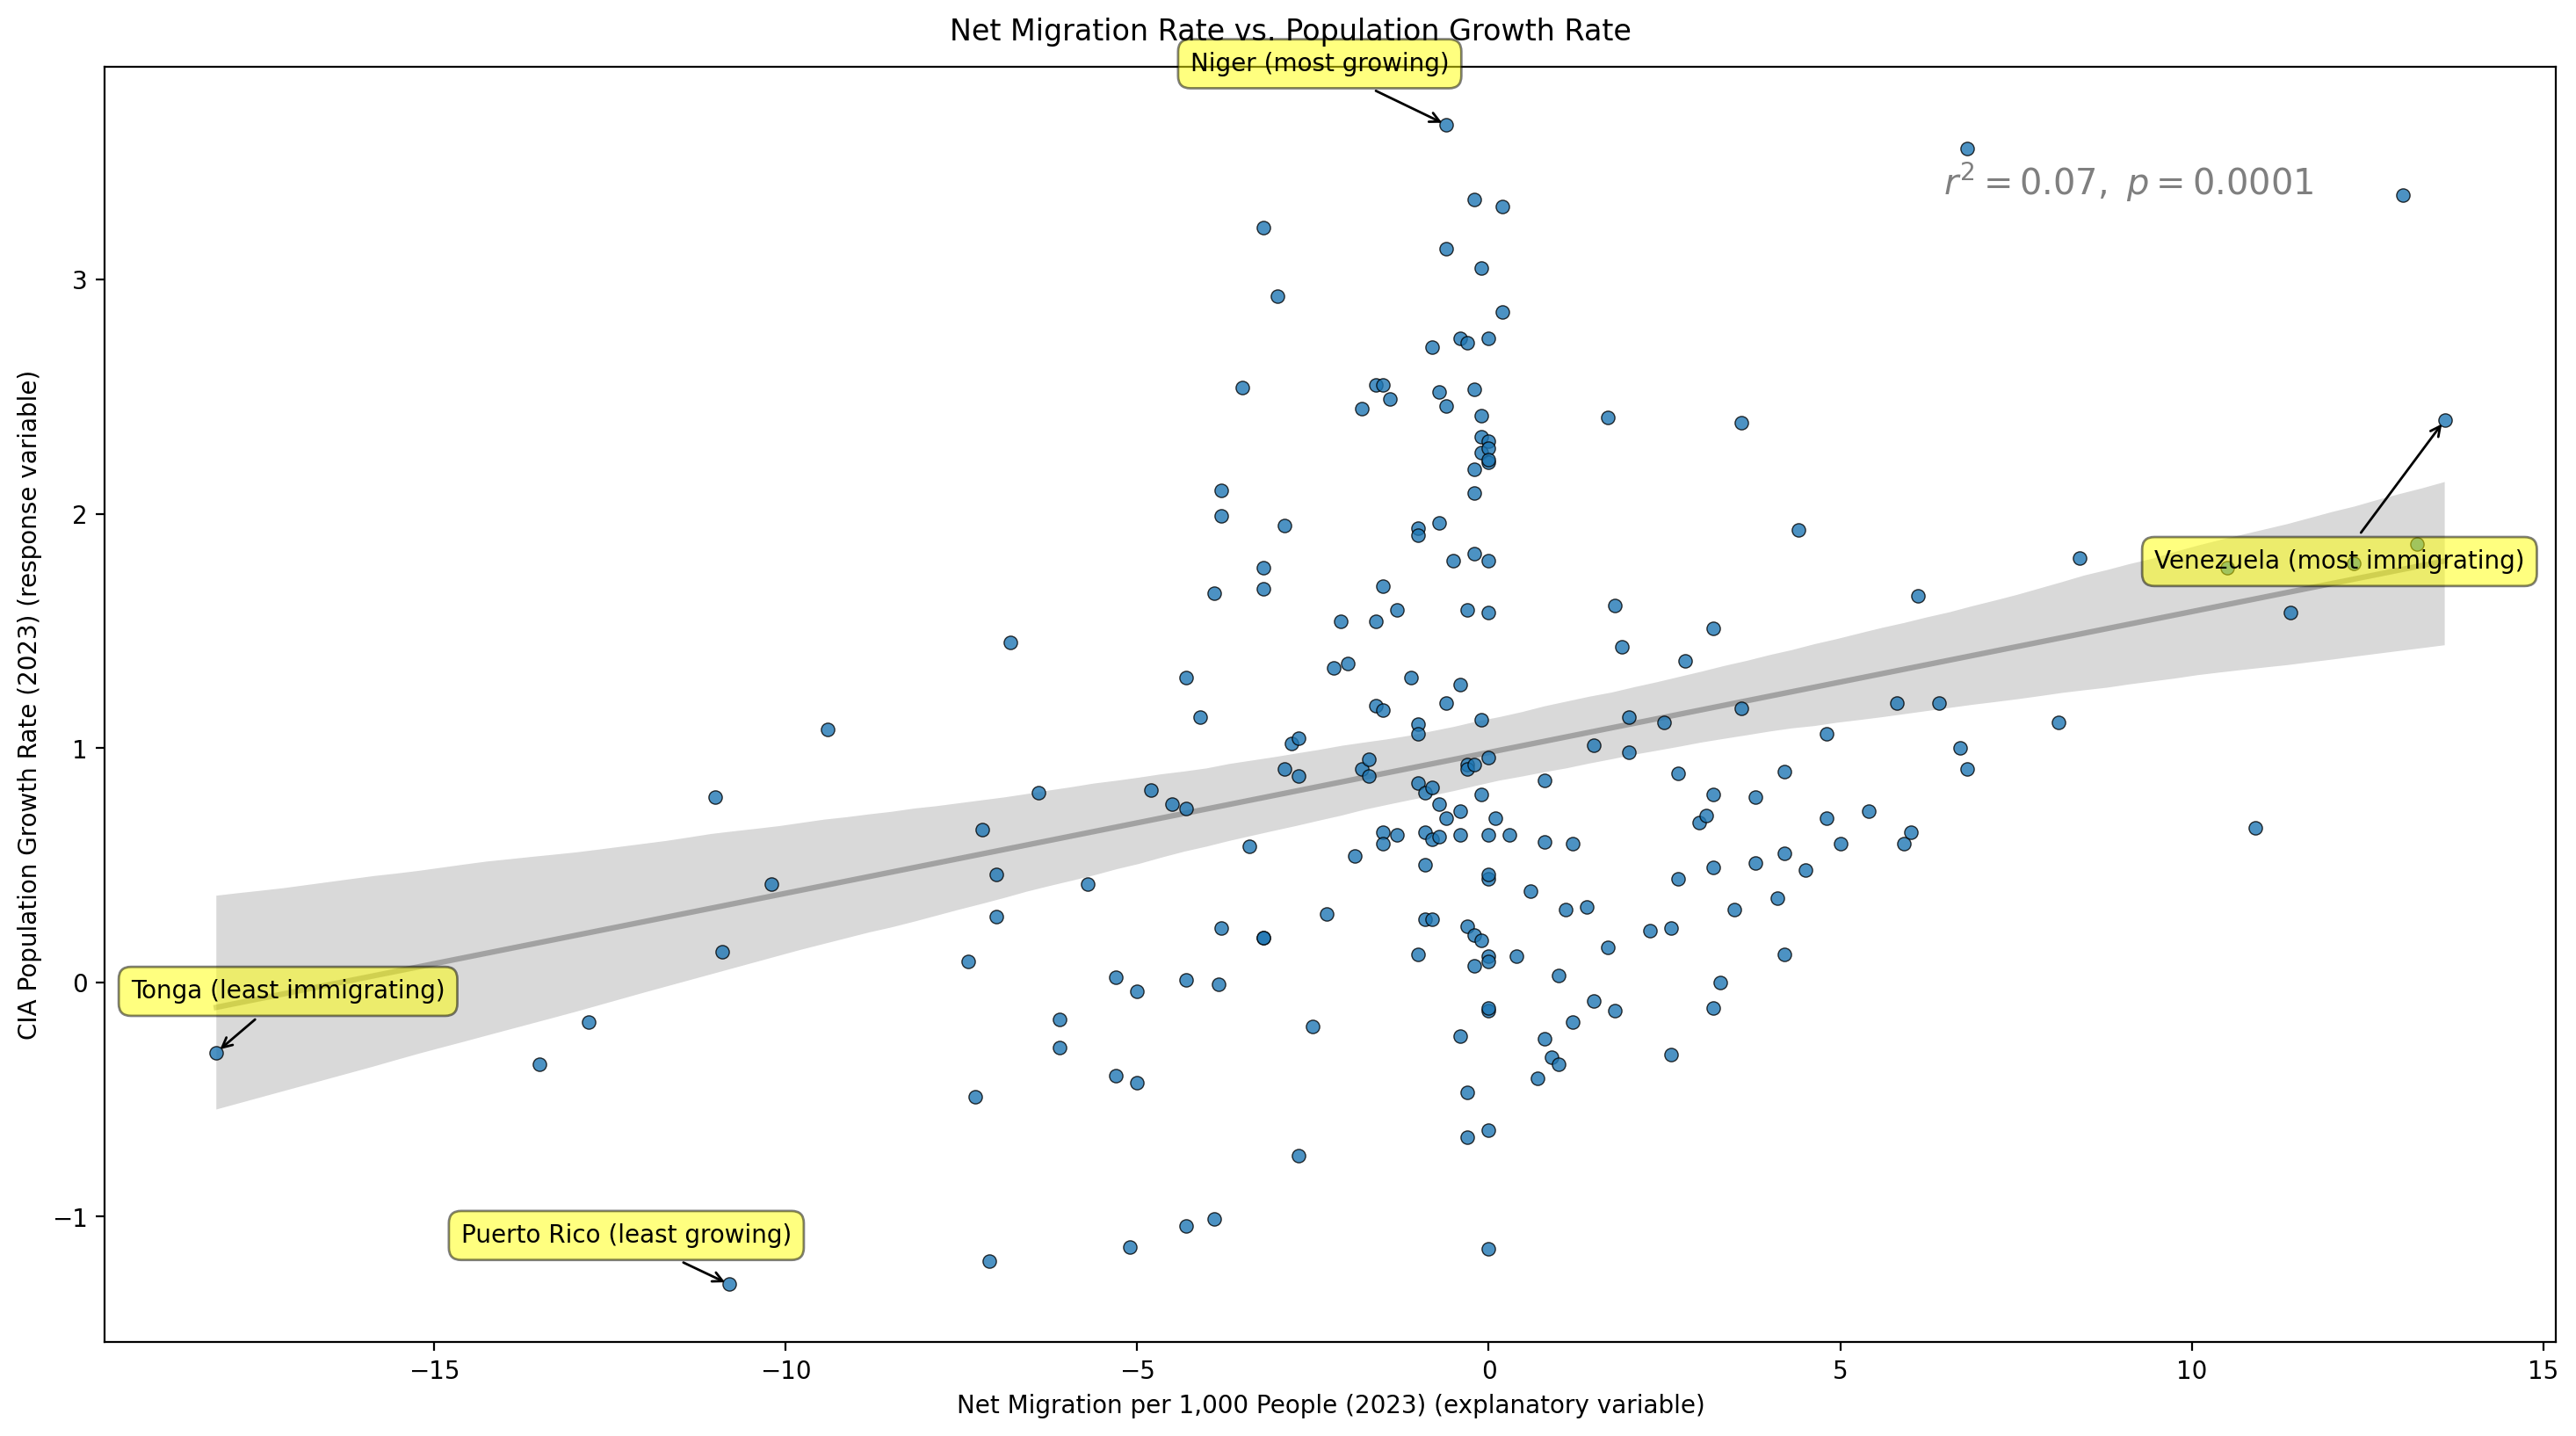

In [75]:

mask_series = population_growth_vs_migration_df.country_name.isin(['Syria', 'American Samoa', 'Ukraine', 'Cook Islands', 'South Sudan', 'Micronesia'])
fig = nu.first_order_linear_scatterplot(
    population_growth_vs_migration_df[~mask_series].set_index('country_name'), 'migration_per_1000', 'CIA_percent',
    ylabel_str='CIA Population Growth Rate (2023)',
    xlabel_str='Net Migration per 1,000 People (2023)',
    y_adj='growing', x_adj='immigrating',
    title='Net Migration Rate vs. Population Growth Rate',
    least_x_xytext=(-35, 20), most_x_xytext=(-119, -63),
    least_y_xytext=(-110, 15), most_y_xytext=(-105, 20),
    reference_xytext=(-155, -22), color_list=None,
    verbose=False
)


The US label is a light-hearted parody of the morally conceited nature of Woke social dynamics. Take it in the spirit it was given.

## Looking closer at the table at 23:24, I see that Stark is only correlating Europe
Let's filter out everything but the European countries and look at the correlation

In [76]:

# Get list of European countries
url = 'https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_in_Europe'
table_dfs_list = nu.get_page_tables(url)

[(1, (50, 8)), (4, (6, 8)), (2, (5, 8)), (12, (20, 2)), (7, (12, 3)), (6, (3, 8)), (8, (4, 2)), (11, (4, 2)), (15, (4, 2)), (17, (4, 2)), (10, (3, 2)), (16, (3, 2)), (18, (3, 2)), (19, (3, 2)), (9, (2, 2)), (13, (2, 2)), (0, (1, 2)), (3, (1, 2)), (5, (1, 2)), (14, (1, 2))]


In [77]:

# Grab the largest table and clean it up
europe_df = table_dfs_list[1].copy()
europe_df.columns = ['Flag', 'Map', 'English', 'Domestic', 'Capital', 'Population', 'Area', 'Currency']
europe_df.sample(5)

,Flag,Map,English,Domestic,Capital,Population,Area,Currency
26,NaN,NaN,Lithuania* Republic of Lithuania LTU,Lithuanian: Lietuva – Lietuvos Respublika,Vilnius Lithuanian: Vilnius,2786651,"65,300 km2 (25,212 sq mi)",Euro
37,NaN,NaN,Romania* ROU,Romanian: România,Bucharest Romanian: București,19328560,"238,391 km2 (92,043 sq mi)",Romanian leu
7,NaN,NaN,Bosnia and Herzegovina BIH,Bosnian: Bosna i Hercegovina Croatian: Bosna i...,Sarajevo Bosnian: Sarajevo Croatian: Sarajevo ...,3270943,"51,197 km2 (19,767 sq mi)",Bosnia and Herzegovina convertible mark
18,NaN,NaN,Greece* Hellenic Republic GRC,Greek: Ελλάδα – Ελληνική Δημοκρατία (Elláda – ...,Athens Greek: Αθήνα (Athína),10445365,"131,957 km2 (50,949 sq mi)",Euro
22,NaN,NaN,Italy* Italian Republic ITA,Italian: Italia – Repubblica Italiana,Rome Italian: Roma,59240329,"301,340 km2 (116,348 sq mi)",Euro


In [78]:

# Create a dictionary of ISO 3166-1 alpha-3 codes
iso_dict = {
    'ABW': 'Aruba',
    'AFG': 'Afghanistan',
    'AGO': 'Angola',
    'AIA': 'Anguilla',
    'ALA': 'Åland Islands',
    'ALB': 'Albania',
    'AND': 'Andorra',
    'ARE': 'United Arab Emirates',
    'ARG': 'Argentina',
    'ARM': 'Armenia',
    'ASM': 'American Samoa',
    'ATA': 'Antarctica',
    'ATF': 'French Southern and Antarctic Lands',
    'ATG': 'Antigua and Barbuda',
    'AUS': 'Australia',
    'AUT': 'Austria',
    'AZE': 'Azerbaijan',
    'BDI': 'Burundi',
    'BEL': 'Belgium',
    'BEN': 'Benin',
    'BES': 'Caribbean Netherlands',
    'BFA': 'Burkina Faso',
    'BGD': 'Bangladesh',
    'BGR': 'Bulgaria',
    'BHR': 'Bahrain',
    'BHS': 'The Bahamas',
    'BIH': 'Bosnia and Herzegovina',
    'BLM': 'Saint Barthélemy',
    'BLR': 'Belarus',
    'BLZ': 'Belize',
    'BMU': 'Bermuda',
    'BOL': 'Bolivia',
    'BRA': 'Brazil',
    'BRB': 'Barbados',
    'BRN': 'Brunei',
    'BTN': 'Bhutan',
    'BVT': 'Bouvet Island',
    'BWA': 'Botswana',
    'CAF': 'Central African Republic',
    'CAN': 'Canada',
    'CCK': 'Cocos (Keeling) Islands',
    'CHE': 'Switzerland',
    'CHL': 'Chile',
    'CHN': 'China',
    'CIV': 'Ivory Coast',
    'CMR': 'Cameroon',
    'COD': 'Democratic Republic of the Congo',
    'COG': 'Republic of the Congo',
    'COK': 'Cook Islands',
    'COL': 'Colombia',
    'COM': 'Comoros',
    'CPV': 'Cabo Verde',
    'CRI': 'Costa Rica',
    'CUB': 'Cuba',
    'CUW': 'Curaçao',
    'CXR': 'Christmas Island',
    'CYM': 'Cayman Islands',
    'CYP': 'Cyprus',
    'CZE': 'Czechia',
    'DEU': 'Germany',
    'DJI': 'Djibouti',
    'DMA': 'Dominica',
    'DNK': 'Denmark',
    'DOM': 'Dominican Republic',
    'DZA': 'Algeria',
    'ECU': 'Ecuador',
    'EGY': 'Egypt',
    'ERI': 'Eritrea',
    'ESH': 'Western Sahara',
    'ESP': 'Spain',
    'EST': 'Estonia',
    'ETH': 'Ethiopia',
    'FIN': 'Finland',
    'FJI': 'Fiji',
    'FLK': 'Falkland Islands',
    'FRA': 'France',
    'FRO': 'Faroe Islands',
    'FSM': 'Federated States of Micronesia',
    'GAB': 'Gabon',
    'GBR': 'United Kingdom',
    'GEO': 'Georgia',
    'GGY': 'Bailiwick of Guernsey',
    'GHA': 'Ghana',
    'GIB': 'Gibraltar',
    'GIN': 'Guinea',
    'GLP': 'Guadeloupe',
    'GMB': 'The Gambia',
    'GNB': 'Guinea-Bissau',
    'GNQ': 'Equatorial Guinea',
    'GRC': 'Greece',
    'GRD': 'Grenada',
    'GRL': 'Greenland',
    'GTM': 'Guatemala',
    'GUF': 'French Guiana',
    'GUM': 'Guam',
    'GUY': 'Guyana',
    'HKG': 'Hong Kong',
    'HMD': 'Heard Island and McDonald Islands',
    'HND': 'Honduras',
    'HRV': 'Croatia',
    'HTI': 'Haiti',
    'HUN': 'Hungary',
    'IDN': 'Indonesia',
    'IMN': 'Isle of Man',
    'IND': 'India',
    'IOT': 'British Indian Ocean Territory',
    'IRL': 'Republic of Ireland',
    'IRN': 'Iran, Islamic Republic of',
    'IRQ': 'Iraq',
    'ISL': 'Iceland',
    'ISR': 'Israel',
    'ITA': 'Italy',
    'JAM': 'Jamaica',
    'JEY': 'Jersey',
    'JOR': 'Jordan',
    'JPN': 'Japan',
    'KAZ': 'Kazakhstan',
    'KEN': 'Kenya',
    'KGZ': 'Kyrgyzstan',
    'KHM': 'Cambodia',
    'KIR': 'Kiribati',
    'KNA': 'Saint Kitts and Nevis',
    'KOR': 'South Korea',
    'KWT': 'Kuwait',
    'LAO': 'Laos',
    'LBN': 'Lebanon',
    'LBR': 'Liberia',
    'LBY': 'Libya',
    'LCA': 'Saint Lucia',
    'LIE': 'Liechtenstein',
    'LKA': 'Sri Lanka',
    'LSO': 'Lesotho',
    'LTU': 'Lithuania',
    'LUX': 'Luxembourg',
    'LVA': 'Latvia',
    'MAC': 'Macau',
    'MAF': 'Collectivity of Saint Martin',
    'MAR': 'Morocco',
    'MCO': 'Monaco',
    'MDA': 'Moldova',
    'MDG': 'Madagascar',
    'MDV': 'Maldives',
    'MEX': 'Mexico',
    'MHL': 'Marshall Islands',
    'MKD': 'North Macedonia',
    'MLI': 'Mali',
    'MLT': 'Malta',
    'MMR': 'Myanmar',
    'MNE': 'Montenegro',
    'MNG': 'Mongolia',
    'MNP': 'Northern Mariana Islands',
    'MOZ': 'Mozambique',
    'MRT': 'Mauritania',
    'MSR': 'Montserrat',
    'MTQ': 'Martinique',
    'MUS': 'Mauritius',
    'MWI': 'Malawi',
    'MYS': 'Malaysia',
    'MYT': 'Mayotte',
    'NAM': 'Namibia',
    'NCL': 'New Caledonia',
    'NER': 'Niger',
    'NFK': 'Norfolk Island',
    'NGA': 'Nigeria',
    'NIC': 'Nicaragua',
    'NIU': 'Niue',
    'NLD': 'Netherlands',
    'NOR': 'Norway',
    'NPL': 'Nepal',
    'NRU': 'Nauru',
    'NZL': 'New Zealand',
    'OMN': 'Oman',
    'PAK': 'Pakistan',
    'PAN': 'Panama',
    'PCN': 'Pitcairn Islands',
    'PER': 'Peru',
    'PHL': 'Philippines',
    'PLW': 'Palau',
    'PNG': 'Papua New Guinea',
    'POL': 'Poland',
    'PRI': 'Puerto Rico',
    'PRK': 'North Korea',
    'PRT': 'Portugal',
    'PRY': 'Paraguay',
    'PSE': 'State of Palestine',
    'PYF': 'French Polynesia',
    'QAT': 'Qatar',
    'REU': 'Réunion',
    'ROU': 'Romania',
    'RUS': 'Russia',
    'RWA': 'Rwanda',
    'SAU': 'Saudi Arabia',
    'SDN': 'Sudan',
    'SEN': 'Senegal',
    'SGP': 'Singapore',
    'SGS': 'South Georgia and the South Sandwich Islands',
    'SHN': 'Saint Helena, Ascension and Tristan da Cunha',
    'SJM': 'Svalbard and Jan Mayen',
    'SLB': 'Solomon Islands',
    'SLE': 'Sierra Leone',
    'SLV': 'El Salvador',
    'SMR': 'San Marino',
    'SOM': 'Somalia',
    'SPM': 'Saint Pierre and Miquelon',
    'SRB': 'Serbia',
    'SSD': 'South Sudan',
    'STP': 'São Tomé and Príncipe',
    'SUR': 'Suriname',
    'SVK': 'Slovakia',
    'SVN': 'Slovenia',
    'SWE': 'Sweden',
    'SWZ': 'Eswatini',
    'SXM': 'Sint Maarten',
    'SYC': 'Seychelles',
    'SYR': 'Syria',
    'TCA': 'Turks and Caicos Islands',
    'TCD': 'Chad',
    'TGO': 'Togo',
    'THA': 'Thailand',
    'TJK': 'Tajikistan',
    'TKL': 'Tokelau',
    'TKM': 'Turkmenistan',
    'TLS': 'East Timor',
    'TON': 'Tonga',
    'TTO': 'Trinidad and Tobago',
    'TUN': 'Tunisia',
    'TUR': 'Turkey',
    'TUV': 'Tuvalu',
    'TWN': 'Taiwan',
    'TZA': 'Tanzania',
    'UGA': 'Uganda',
    'UKR': 'Ukraine',
    'UMI': 'United States Minor Outlying Islands',
    'URY': 'Uruguay',
    'USA': 'United States',
    'UZB': 'Uzbekistan',
    'VAT': 'Vatican City',
    'VCT': 'Saint Vincent and the Grenadines',
    'VEN': 'Venezuela',
    'VGB': 'British Virgin Islands',
    'VIR': 'United States Virgin Islands',
    'VNM': 'Vietnam',
    'VUT': 'Vanuatu',
    'WLF': 'Wallis and Futuna',
    'WSM': 'Samoa',
    'YEM': 'Yemen',
    'ZAF': 'South Africa',
    'ZMB': 'Zambia',
    'ZWE': 'Zimbabwe'
}

In [80]:

# Get the list of European countries
european_countries_list = sorted(europe_df.English.map(lambda x: iso_dict.get(str(x)[-3:], str(x)[-3:])).tolist())
print(european_countries_list)

# Check against all countries to find typos
sorted(countries_set - set(european_countries_list))

['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Italy', 'Kazakhstan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Republic of Ireland', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']


['Afghanistan', 'Algeria', 'Argentina', 'Australia', 'Bangladesh', 'Bolivia', 'Botswana', 'Brazil', 'Burkina Faso', 'Cameroon', 'Canada', 'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Czech Republic', 'DR Congo', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Ethiopia', 'Ghana', 'Guatemala', 'Guinea-Bissau', 'Honduras', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Japan', 'Jordan', 'Kenya', 'Kyrgyzstan', 'Lebanon', 'Liberia', 'Malaysia', 'Mali', 'Mexico', 'Morocco', 'Mozambique', 'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Palestine', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Rwanda', 'Senegal', 'South Africa', 'South Korea', 'Tajikistan', 'Tanzania', 'Tunisia', 'Uganda', 'United States', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Zambia']

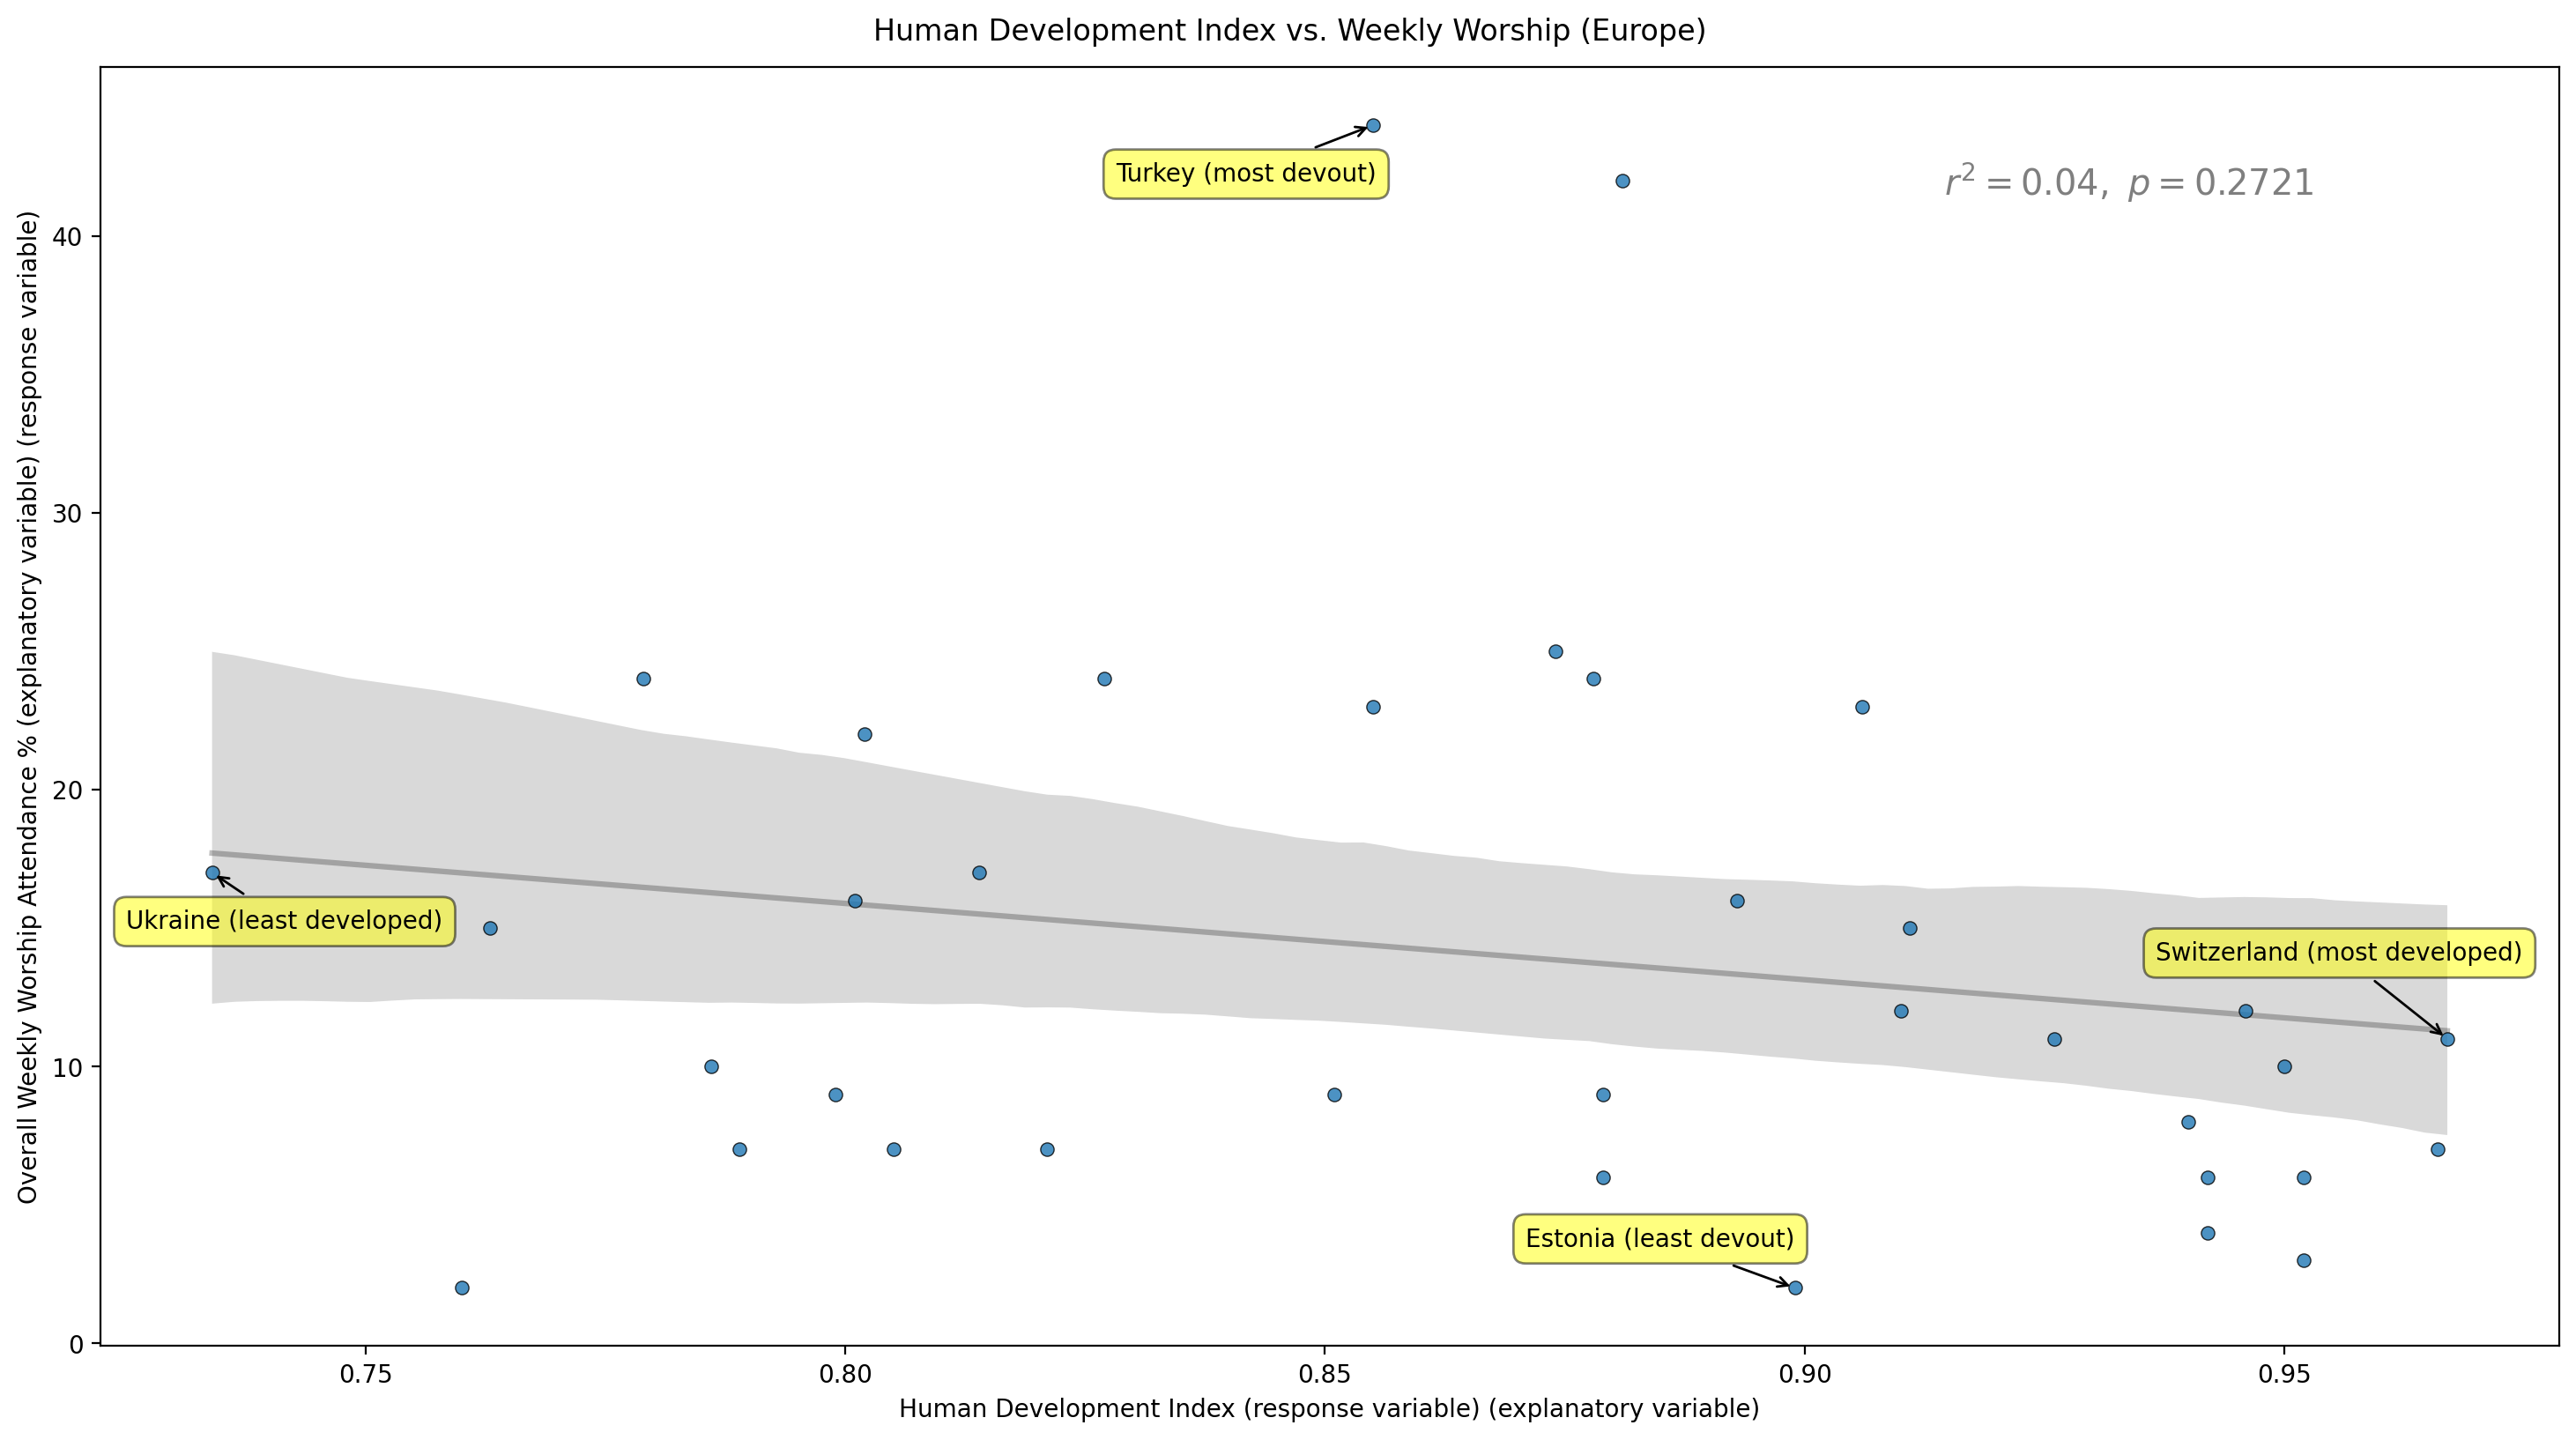

In [90]:

# Filter out non-European countries
mask_series = population_growth_vs_migration_df.country_name.isin(european_countries_list)
fig = nu.first_order_linear_scatterplot(
    population_growth_vs_migration_df[mask_series].set_index('country_name'), 'CIA_percent', 'migration_per_1000',
    xlabel_str='Population Growth Rate (response variable)',
    ylabel_str='Overall Net Migration Rate Attendance % (explanatory variable)',
    x_adj='developed', y_adj='devout',
    title='Population Growth Rate vs. Net Migration Rate (Europe)',
    # idx_reference='Kenya', annot_reference='',
    least_x_xytext=(-35, -25), most_x_xytext=(-119, 30),
    least_y_xytext=(-110, 15), most_y_xytext=(-105, -25),
    reference_xytext=(-155, -22), color_list=None
)